# Classification of NBA players role

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluting your notebook!

### Dataset description

We will be working with a dataset of NBA basketball players data (you can get from https://www.kaggle.com/jacobbaruch/nba-player-of-the-week the full dataset).

The provided data is a subset of the full dataset containing the players that have the role of Center and of Point Guard. For each player the dataset contains the height, weight and age.

From Wikipedia:

The Center (C), also known as the five, or the big man, is one of the five positions in a regular basketball game. The center is normally the tallest player on the team, and often has a great deal of strength and body mass as well. In the NBA, the center is usually 6' 10" (2.08 m) or taller and usually weighs 240 lbs (109 kg) or more. 

Point Guards (PG, a.k.a. as "play maker") are expected to run the team's offense by controlling the ball and making sure that it gets to the right players at the right time. In the NBA, point guards are usually about 6' 3" (1.93 m) or shorter, and average about 6' 2" (1.88 m). Having above-average size (height, muscle) is considered advantageous, although size is secondary to situational awareness, speed, quickness, and ball handling skills. Shorter players tend to be better dribblers since they are closer to the floor, and thus have better control of the ball while dribbling. 

As it is clear from the description, the height and weight of the player are good hints to predict their role and in this lab we'll exploit these features to estimate the role.


### Three features are present in this dataset:


1) Height in cm

2) Weight in kg

3) Age in years



We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
3
import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
We will implement the perceptron and use it to learn a halfspace.

**TO DO** Set the random seed to your ID (matricola).

In [2]:
IDnumber =1206077
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (50%-50%) after applying a random permutation to the datset.

In [3]:
#load the dataset
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA) #skip first line
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:3]
Y = dataset[:,0]

Y = Y*2-1  # set labels to -1, 1 as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

Y=Y.reshape(len(Y),1)

['Position', 'Height cm', 'kg', 'Age']


We are going to classify class "1" (Center) vs class "-1" (Point Guard)

**TO DO** Divide the data into training set and test set (50% of the data each)

In [4]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.



#m_training needs to be the number of samples in the training set
m_training = len(X)//2

#m_test needs to be the number of samples in the test set
m_test = len(X)-m_training
print("dimensione training: ",m_training,"dimensione test: ",m_test)

X_training=X[0:m_training,:]

    
    
#Y_training = labels for the training set
Y_training=Y[0:m_training,:]





#X_test = instances for test set
X_test = X[m_training::,:]
#Y_test = labels for the test set
Y_test = Y[m_training::,:]

print("X_training shape= ",X_training.shape,"\n \n Y_training shape= ",Y_training.shape,"\n \n X_test shape= ",X_test.shape,"\n \n Y_test shape= ",Y_test.shape)
#controllo Y_test/Y_training:
#print(Y_training,"\n",Y_test)

dimensione training:  130 dimensione test:  130
X_training shape=  (130, 2) 
 
 Y_training shape=  (130, 1) 
 
 X_test shape=  (130, 2) 
 
 Y_test shape=  (130, 1)


**TO DO** Now add a 1 in front of each sample so that we can use a vector to describe all the coefficients of the model (homogeneous coordinates). You can use the function $hstack$ in $numpy$

In [5]:
#add a 1 to each sample
uno=np.ones((m_training,1))

if X_training[1,0]!=1:
    X_training = np.hstack((uno,X_training))
    X_test = np.hstack((uno,X_test))
#print(X_test,X_training)

**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where 1 iteration corresponds to 1 update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of missclassified samples for the best model

In [6]:
def perceptron(X, Y, max_num_iterations):
      
    w=np.zeros((1,len(X[0])))

    W__E=[]
    for t in range(max_num_iterations):
        listaerroriinx=[]
        listaerroriiny=[]    
        erroritotali=0
        for i in range(len(X)):
            if Y[i]*np.dot(w,X[i])<=0:
                listaerroriiny.append(Y[i])
                listaerroriinx.append(X[i])
        
        index=np.random.randint(0,len(listaerroriiny))
        
        w= w + listaerroriiny[index]*listaerroriinx[index]
        for i in range(len(X)):
            if Y[i]*np.dot(w,X[i])<=0:
                erroritotali=erroritotali+1
        
        W__E.append([w,erroritotali/len(Y)])
    
    best_w=[0,0,0]
    best_error=1
    for i in range(len(W__E)):
        if W__E[i][1]<best_error:
            best_error=W__E[i][1]
            best_w=W__E[i][0]    
            
            
            
    
    
    return best_w, best_error



Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training,Y_training, 100)
print("w_found: ",w_found,"errore training con 100 iterazioni ",error)

w_found:  [[  -6. -312.  647.]] errore training con 100 iterazioni  0.08461538461538462


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of missclassified samples in the test set (that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dataset

num_errors = 0

for t in range(len(X_test)):
    if Y_test[t]*np.dot(w_found,X_test[t])<=0:
        num_errors=num_errors+1

true_loss_estimate = num_errors/m_test
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("errore test con 100 iterazioni ",true_loss_estimate)


errore test con 100 iterazioni  0.05384615384615385


**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 10000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
#now run the perceptron for 10000 iterations here!
w_found, error = perceptron(X_training,Y_training, 10000)

print("errore training con 10000 iterazioni ",error)

num_errors = 0.

for t in range(len(X_test)):
    if Y_test[t]*np.dot(w_found,X_test[t])<=0:
        num_errors=num_errors+1

true_loss_estimate = num_errors/m_test

print("errore test con 10000 iterazioni ",true_loss_estimate)


errore training con 10000 iterazioni  0.08461538461538462
errore test con 10000 iterazioni  0.05384615384615385


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of missclassified samples? Explain what you observe. [Write the answer in this cell]


**ANSWER** 

l'errore del training nel caso delle 100 iterazioni o delle 10'000 iterazioni è simile in quanto l'errore all'aumentare del numero di interazioni va a saturare come si può evincere dal grafico nella seguente shell  nel quale è stato valutato l'errore del training set(in blu) e del test set (in arancione) al variare del numero di iterazioni svolte e da quanto emerge dai dati 100 iterazioni è un numero di iterazioni sufficiente per avere un errore accettabile dell'ordine del 10% se non minore.

valutando le differenze tra l'errore del training e del test ci si aspetterebbe che l' errore del training fosse più piccolo (a parità di iterazioni) in quanto il vettore w è proprio calcolato sfruttando il trainig set. I valori ottenuti dal mio programma però sembra che risentano molto del seed iniziale che si usa per la randomizzazione in quanto cambiandolo si ottiene il comportamento appena descritto. usando il mio numero di matricola si vede che in realtà l' errore sul test è minore di quello sul training e quindi si conclude dicendo che l'oscillazione è talmente piccola che non può essere apprezzata, fatto dovuto appunto alla randomizzazione.(confrontando i risultati con altri seed risulta che è possibile ottenere il comportamento aspettato)



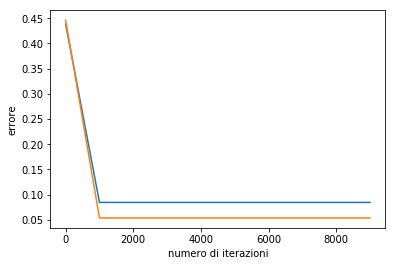

In [10]:
#saturazione dell' errore del training set
indice=[]
E=[]
T=[]
for i in range(1,10000,1000):
    w_found, error = perceptron(X_training,Y_training, i)
    indice.append(i)
    E.append(error)
    num_errors=0
    for t in range (len(X_test)):
        if Y_test[t] * np.dot(w_found,X_test[t]) <= 0:
            num_errors += 1

    T.append(num_errors / m_test)
plt.xlabel("numero di iterazioni")
plt.ylabel("errore")
plt.plot(indice,E)
plt.plot(indice,T)

# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [11]:
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA)
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:]
Y = dataset[:,0]

Y = Y*2-1  # set labels to -1, 1 as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]


['Position', 'Height cm', 'kg', 'Age']


**TO DO** As for the previous part, divide the data into training and test (50%-50%) and add a 1 as first component to each sample.

In [12]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.
m_training = len(X)//2

#m_test needs to be the number of samples in the test set
m_test = len(X)-m_training
print("dimensione training: ",m_training,"dimensione test: ",m_test)

X_training=X[0:m_training,:]

    
    
#Y_training = labels for the training set
Y_training=Y[0:m_training]





#X_test = instances for test set
X_test = X[m_training::,:]
#Y_test = labels for the test set
Y_test = Y[m_training::]

print(Y_training)

dimensione training:  130 dimensione test:  130
[-1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1 -1 -1  1 -1  1 -1  1 -1
  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1  1
 -1 -1  1  1  1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1
  1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1
  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1  1 -1 -1  1
  1  1  1 -1  1  1 -1 -1  1  1]


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in the lecture.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [13]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5)

#learn from training set

logreg.fit(X_training,Y_training)

#print(logreg.coef_)
#predict on training set

predic_training=logreg.predict(X_training)
predic_training= predic_training.reshape((len(predic_training),1))
#print the error rate = fraction of missclassified samples
error_pre=0
for i in range(len(Y_training)):
    if predic_training[i]!=Y_training[i]:
        error_pre=error_pre+1
    else: error_pre=error_pre
        

error_rate_training=error_pre/len(Y_training)
print("Error rate on training set: "+str(error_rate_training))

#predict on test set

predic_test=logreg.predict(X_test)
predic_test= predic_test.reshape((len(predic_test),1))
#print the error rate = fraction of missclassified samples
error_test=0
for i in range(len(Y_test)):
    if predic_test[i]!=Y_test[i]:
        error_test=error_test+1
    else: error_test=error_test
        

error_rate_test=error_test/len(Y_test)

print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.08461538461538462
Error rate on test set: 0.05384615384615385


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [14]:
#to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['height', 'weight', 'age']
labels_list = ['Center', 'Point guard']

index_feature1 = 0
index_feature2 = 1
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

X_training = X_reduced[0:m_training,:]
Y_training = Y[:m_training]


X_test = X_reduced[m_training::,:]
Y_test = Y[m_training:]




Now learn a model using the training data.

In [15]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_training,Y_training)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

(130,) (130,) (130, 2) (130, 2)


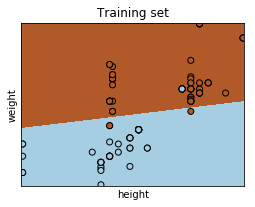

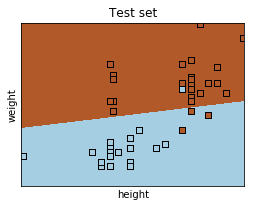

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

#Y_training=Y_training.reshape(1,m_training)
#Y_test=Y_test.reshape(1,m_test)

print(Y_training.shape, Y_test.shape, X_training.shape , X_test.shape)


h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()
